## Intro to sklearn

In [1]:
# Following the standard sklearn workflow:
# This is a workflow template that can be called by name for quick review
sklearn_workflow = [
    "1. Getting the data ready",
    "2. Choose the right estimator-algorithm for our problems",
    "3. Fit the model-algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together! "]

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# The goal is to use the data to try and predict if the patient has heart disease or not.
# The column 'target' describes if the patient has heart disease or not. 
# (1=has, 0=does not have)

In [4]:
# Create X (features matrix) but drop the target column
x = heart_disease.drop("target", axis=1)

# Create y (labels) which in this case is the target column
y = heart_disease["target"]

In [5]:
# There are various warnings you can get with scikit-learn in jupyter notebook.
# The following commands will suppress the warnings if you want to.

# import warnings
# warnings.filterwarnings("ignore")

# You can set the warnings back to default with the following command.
# warnings.filterwarnings("default")

In [6]:
# Choose the right model and hyperparameters
# In this case we need a classification model.
# So we will try the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


In [7]:
# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
# Some jupyter in vscode shortcuts:
# to switch from edit to command mode = esc
# to switch from command mode to edit mode = enter
# switch between code to markdown mode = esc + m
# If in submitted markdown mode, hit enter to go back to markdown edit mode   
# switch from markdown mode to code mode = esc + r
# switch from markdown mode to python mode = esc + y


In [10]:
clf.fit(x_train, y_train);

In [11]:
# Make a prediction
y_preds = clf.predict(np.array(x_test))
y_preds

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [12]:
y_test

234    0
114    1
185    0
44     1
233    0
      ..
285    0
265    0
75     1
268    0
10     1
Name: target, Length: 61, dtype: int64

In [13]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.819672131147541

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.93      0.74      0.82        34

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[25,  2],
       [ 9, 25]])

In [17]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [18]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 1000, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 88.52%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%

Trying model with 100 estimators...
Model accuracy on test set: 83.61%

Trying model with 110 estimators...
Model accuracy on test set: 85.25%

Trying model with 120 estimators...
Model accuracy on test set: 85.25%

Trying model with 130 estimators...
Model accuracy on test set: 85.25%

Trying model with 140 estimators...
Model accuracy on test set: 81.97%

T

In [19]:
# 6. Save a model 
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [20]:
# 6. Load a saved model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

In [21]:
sklearn_workflow

['1. Getting the data ready',
 '2. Choose the right estimator-algorithm for our problems',
 '3. Fit the model-algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together! ']

In [22]:
# Getting our data ready to be used with machine learning
# Three main things we have to do:
# 1. Split the data into features and labels (usually 'x' and 'y')
# 2. Filling (also called imputing) or disregarding missing values
# 3. Converting non-numerical values to numerical values (also called feature encoding)



In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
X.shape[0] * 0.8

242.4

In [29]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [30]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")

In [31]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [32]:
len(car_sales)

1000

In [33]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [34]:
# Split data into X and y 
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [35]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Build machine learning model
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

# In this case the following code will not work because the data is not numerical
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [37]:
# Because the previous commented section of code does not work, 
# we need to convert the data to numerical.

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [38]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [39]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [40]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Lets refit the model  
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

In [41]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
model.score(X_test, y_test)

0.3281222657899089

In [43]:
# From sklearn version 0.23+,OneHotEncoder can handle None and NaN values   
import sklearn
print(sklearn.__version__)

1.2.2


### What if there were missing values?
1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogther.

In [44]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
# Check how many missing values per column
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Try to convert data to numbers
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


In [47]:
# Trying to turn the categories into numbers again

# This was supposed to fail because of the missing values (ValueError: input contains NaN)
# But in this case it no longer does because of the new version of sklearn
# Can handle None and NaN values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [48]:
# Fill the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [49]:
# Check DataFrame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [50]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [51]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
len(car_sales_missing)

950

In [53]:
# Trying again
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Trying to turn the categories into numbers again
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [54]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
# Drop rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
                

In [58]:
# Check the missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [59]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [60]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:

# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# One hot encode the features 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [64]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for our problem
Some things to note:
* Sklearn refers to machine learning models and algorithms as estimators.
* Classification - predicting whether a sample is one thing or another
    * Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
* Regression - predicting a number (selling price of a car)

If you're working on a regression problem, check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### 2.1 Picking  a machine learning model for a regression problem
Let's use the California housing dataset


In [65]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [66]:
# From california housing dataset, turn it into a pandas DataFrame 
# with data coming from housing data and column names coming from
# housing feature names
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
# Attempting to use all of the other California housing values 
# to predict the "MedHouseVal" value which we will call target in a new column
housing_df["Target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
# Choose your model/estimator.
# You can use # https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
# as a guide when selecting model/estimator.

# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"] # median house price in $100,000's

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on test data (on test set)
model.score(X_test, y_test)


0.5758549611440122

* model.score (results in the output of the above cell) returns the coefficient of determination of the prediction.

* The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable when predicting the outcome of a given event. In other words, this coefficient, more commonly known as r-squared (or r2), assesses how strong the linear relationship is between two variables and is heavily relied on by investors when conducting trend analysis.

* So basically its taking the relationship between the features variables and the target variable and its seeing how predictive the model is on selecting the target variable based on the relationship variables.

* The score will be between 0 and 1...the higher the better.

# Trying a different model to compare score

In [70]:
# Trying Lasso Regression

# Import algorithm/estimator
from sklearn.linear_model import Lasso

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"] # median house price in $100,000's

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = Lasso()
model.fit(X_train, y_train)

# Check the score of the model on test data (on test set)
model.score(X_test, y_test)

0.2841671821008396

In [71]:
# ^ Lasso Model score was lower than Ridge Model score

In [72]:
# Trying an ensemble model
# in particular, the RandomForestRegressor

# Import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"] # median house price in $100,000's

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor() # The default number of estimators is 100
model.fit(X_train, y_train)

# Check the score of the model on test data (on test set)
model.score(X_test, y_test)


0.8059809073051385

The ensemble method RandomForestRegressor score (0.805) was a solid improvement over the Ridge model (0.575) and especially over Lasso Regression (0.284)

### 2.2 Choosing an estimator for a classification problem
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [73]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
len(heart_disease)

303

In [75]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=100) # This is intentionally set lower than the default of 1000
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.47540983606557374

In [76]:
# Try again with Ensemble RandomForeClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)


0.8524590163934426

In [77]:
# ^ The RandomForestClassifier performed better than the LinearSVC

## 3.1 Fitting the model to data

Different names for:
   * X = features, feature variables, data    
   * y = labels, targets, target variables

In [78]:
# Try again with Ensemble RandomForeClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

In [79]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [80]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [81]:
# Use a trained model to make predictions using predict()
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [83]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [84]:
# Compre predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test) # common convention to use y_preds for predictions
np.mean(y_preds == y_test)

0.8524590163934426

In [85]:
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Making predictions with `predict_proba()`


In [87]:
# predict_proba() returns probability estimates of a classification label
# Return probability pairs, for each class
# Left value is proablilty of 0, right value is probability of 1
# notice each pairs sums to 1
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [88]:
# predict() on the same data
# will return one value per sample (0 or 1)
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [89]:
'''When might you use predict_proba() instead of predict()?
If you want to see the confidence the model has in each prediction, 
you could use predict_proba() rather than predict(). Then you could eliminate 
weak confidence predictions (for example, the ones barely over 0.50) 
if you wanted to'''

'When might you use predict_proba() instead of predict()?\nIf you want to see the confidence the model has in each prediction, \nyou could use predict_proba() rather than predict(). Then you could eliminate \nweak confidence predictions (for example, the ones barely over 0.50) \nif you wanted to'

`predict()` can also be used for regression models

In [90]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [91]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [92]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [93]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [94]:
len(y_preds)

4128

In [95]:
len(y_test)

4128

In [96]:
''' Notice that the length of y_preds is the same as y_test
So y_preds has one prediction value for every test value.
These can be used to compare to each other to evaluate the model'''

' Notice that the length of y_preds is the same as y_test\nSo y_preds has one prediction value for every test value.\nThese can be used to compare to each other to evaluate the model'

In [97]:
# compare predictions to truth labels to evaluate the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [98]:
''' So the mean_absolute_error result means that our models predictions
are on average 0.3270458119670544 different(+ or -) than the actual 
values of the Target. '''

housing_df["Target"]


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [99]:
sklearn_workflow

['1. Getting the data ready',
 '2. Choose the right estimator-algorithm for our problems',
 '3. Fit the model-algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together! ']

### 4. Evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/esitmators:

1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions

https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [100]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier model
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
# use score method on training data 
# Score values are between 0.0 and 1.0. 
# The higher the score, the higher the accuracy of the model
clf.score(X_train, y_train)

1.0

 ^ Note that using the score method on training data that has already been  
 fitted produces a score of 1. 
   
This is because it is predicting the same data it was trained on. 

In [102]:
clf.score(X_test, y_test)

0.8524590163934426

^ Whereas the score on the training data is 1.0, the score on the  
test data is 0.8524590163934426

### Useing `score()` on a regression problem

In [103]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"] # median house price in $100,000's

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on test data (on test set)
model.score(X_test, y_test)

0.5758549611440122

In [104]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# score the model on test data
model.score(X_test, y_test)

0.8059809073051385

In [105]:
# The default score() evaulation method metric is r^2 for regression algorithms
# Highest = 1.0, lowest = 0.0

4.2 Evaluating a model using the `scoring` parameter

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
# score returns a single value
clf.score(X_test, y_test)


0.8524590163934426

In [108]:
# Cross-validation is a statistical method used to estimate the skill of 
# machine learning models.

# cross_val_score returns and array of scores of the estimator 
# for each run of the cross validation.
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [109]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [110]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [111]:
# Default scoreing parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [112]:
# scoring prarameter set to None by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.21 Classifcation model evaluation metreics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


Accuracy

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)


In [114]:
# Get the mean accuracy score
np.mean(cross_val_score)

0.8248087431693989

In [115]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


In [116]:
heart_disease.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


** Area Under the Receiver operating characteristic curve (AUC/ROC) **

* Area Under the Curve (AUC)
* ROC curve 

ROC curves are a comparision of a model's true positive rate (tpr) versus a models false positive rate (fpt)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [117]:
from sklearn.metrics import roc_curve

# Create x_test...etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.11, 0.89],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [118]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [119]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

In [120]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.375  , 0.40625, 0.5    ,
       0.5625 , 0.59375, 0.59375, 0.625  , 0.71875, 0.71875, 0.78125,
       0.84375, 0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     ])

In [121]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.87, 0.86, 0.85, 0.81, 0.8 , 0.77, 0.76,
       0.71, 0.66, 0.6 , 0.5 , 0.49, 0.4 , 0.38, 0.31, 0.28, 0.23, 0.2 ,
       0.19, 0.15, 0.07, 0.05, 0.  ])

Plot ROC curve

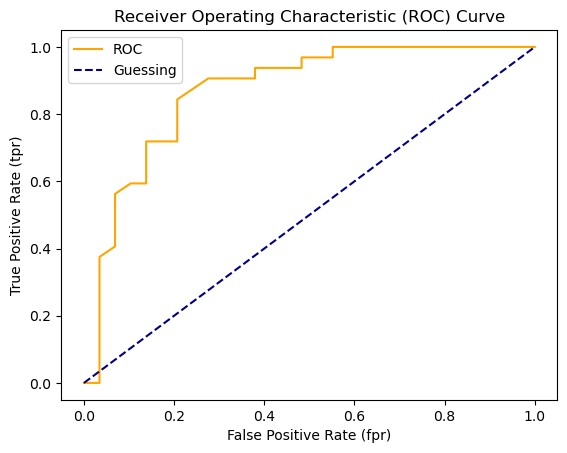

In [122]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """

    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [123]:
# Calculate AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8696120689655172

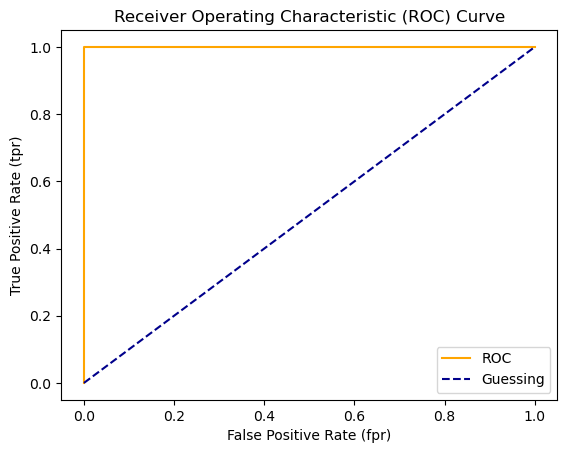

In [124]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [125]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [126]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [127]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [128]:
23 + 4 + 7 + 27

61

In [129]:
len(X_test)

61

**Confusion Matrix**  
A confusion matrix is a quick way to compare the labels a model predicts and
the actual labels it was supposed to predict.

Confusion Matrix Anatomy:  

(0,0) = True negative  
(1,0) = False positive  
(0,1) = False negative  
(1,1) = True positive  

In [130]:
# Need to install seaborn 
# how to install a conda package into the current environment from a Jupyter Notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

NameError: name 'sys' is not defined

<Axes: >

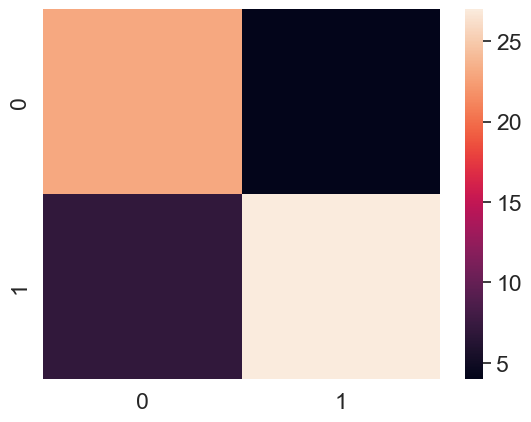

In [ ]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

In [ ]:
# More work needed to create the confusion matrix with Seaborn since its missing data.
# But not worth the effort since sklearn upated ConfusionMatrixDisplay. v1.0+

In [131]:
# Original sklearn confusion matrix used with sklearn vsersion <  v1.0
# Make a confusion matrix with sklearn confusion_matrix() 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [132]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


### Creating a confusion matrix using newer scikit-learn confusion_matrix()
To use the new methods of creating a confusion matrix with Scikit-learn you will need sklearn version 1.0+ - https://scikit-learn.org/stable/install.html

In [133]:
import sklearn
sklearn.__version__

'1.2.2'

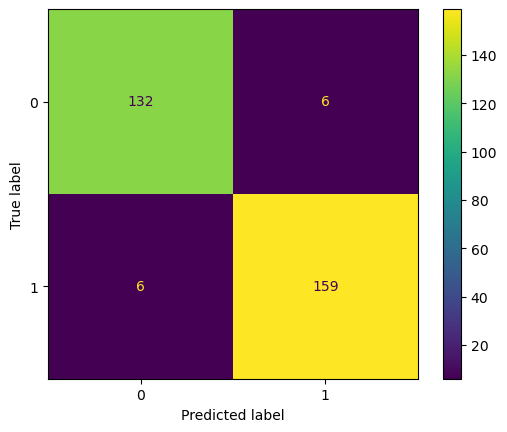

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

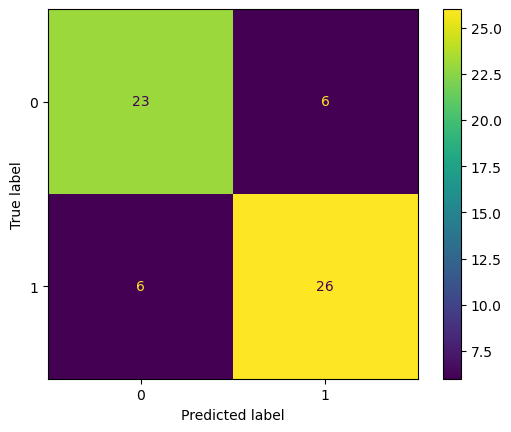

In [135]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds)

#### Classification Report

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



Classification_report Anatomy:
It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).
When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [137]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [138]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

In [139]:
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True, zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

Playing with:
1. R^2 (R Squared) or Coefficient of Determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

**R^2 - R Squared**

What R-squared does:   
Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [160]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

# Make predictions which is required to manually test r2_score
y_predict = model.predict(X_test)

In [146]:
# In Sklearn, the RandomForestRegressor estimator comes with a .score method 
# which uses the R^2 metric by default
model.score(X_test, y_test)

0.8059809073051385

In [147]:
housing_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [149]:
y_test.mean()

2.0550030959302323

In [152]:
# Instead of using the built-in score method, we can calculate r2_score manually
# using the r2_score metric function from Scikit-Learn
from sklearn.metrics import r2_score

#Fill an array with y_test mean so that we can demonstrate an r2_score of 0.0
y_test_mean = np.full(len(y_test), y_test.mean())

In [153]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [154]:
# demonstrate 0.0 score
# Because the true values are tested against the mean of the true values
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [166]:
# demonstrate perfect r2_score
# score of 1.0 (perfect) because we are using the same values for true values and predicted values
r2_score(y_true = y_test, y_pred = y_test)

1.0

In [163]:
# manually calculate r2_score on the actual test data
# we compare the true values of y_test to our model's predicted values of y_predict
r2_score(y_true = y_test, y_pred = y_predict)

0.8059809073051385

*** Mean Absolute Error (MAE) ***  
MAE is the average of the absolute differences between predictions and actual values.   
It gives you an idea of how wrong your predictions were.

In [170]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

# use mae to compare (true values, predicted_values)
mae = mean_absolute_error(y_test, y_preds)

In [171]:
# MAE is the average of the absolute differences between predictions and actual values
mae


0.3270458119670544

In [ ]:
# ^ So the above result means that on average, each prediction 
# has a difference of 0.3270458119670544 (+ or -) the y_test value.

# But we used mean_absolute_error (which takes the absolute value)
# so we don't know if the difference is positive or negative
 

In [168]:
y_preds

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

In [169]:
y_test 

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [172]:
# Trying to make the differences more apparent and see if they were + or -
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})

df["difference"] = df["predicted values"] - df["actual values"]

df.head(10)

,actual values,predicted values,difference
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [173]:
# the positives and negatives throw off the mean
df["difference"].mean()

0.011913192441860052

In [175]:
# But we can correct with the absolute value
# which you can see will match the MAE from earlier

# MAE using formula and differences
np.abs(df["difference"]).mean()

0.3270458119670544

** Mean Squared Error (MSE) **  
MSE is the average of the squared differences between predictions and actual values.

In [176]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)

mse

0.2542443610174998

In [178]:
df["squared_difference"] = np.square(df["difference"])
df.head()

,actual values,predicted values,difference,squared_difference
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [179]:
# Calculate MSE manually
squared = np.square(df["difference"])
squared.mean()

0.2542443610174998

In [180]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_difference"] = 16

In [181]:
df_large_error.head()


,actual values,predicted values,difference,squared_difference
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [182]:
# Calculate MSE with large error
df_large_error["squared_difference"].mean()

0.25812028533523235

In [183]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,difference,squared_difference
20046,0.47700,0.490580,0.013580,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [185]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25
